In [1]:
import pandas as pd
import numpy as np
import string

## Question 1a

In [ ]:
SELECT 
    name_table* 
FROM 
    name_table 
JOIN
    mark_table 
    ON mark_table.studentID = name_table.studentID 
CROSS JOIN
    (
    SELECT
        total_marks
    FROM
        mark_table
    WHERE
        studentID = 'V002'
    )
    mt
WHERE
    mark_table.total_marks > mt.total_marks

## Question 1b

In [2]:
StudentID_list = ['V001', 'V002', 'V003', 'V004']
Name_list= ['Abe', 'Abhay', 'Acelin', 'Adelphos']
Total_marks_list = [95, 80, 74, 81]
name_table = pd.DataFrame(list(zip(StudentID_list, Name_list)),
                         columns = ["StudentID", "Name"])
mark_table = pd.DataFrame(list(zip(StudentID_list, Total_marks_list)),
                         columns = ["StudentID", "Total_marks"])

In [3]:
name_table

,StudentID,Name
0,V001,Abe
1,V002,Abhay
2,V003,Acelin
3,V004,Adelphos


In [4]:
mark_table

,StudentID,Total_marks
0,V001,95
1,V002,80
2,V003,74
3,V004,81


In [5]:
def e_to_upper(df):
    df["Name"] = (df["Name"]).str.lower() # make entire Name column lowercase
    df['Name'] = df['Name'].apply(lambda x:x.upper() if 'e' in x or 'E' in x else x) # uppercase names with 'e' or 'E'
    return df

In [6]:
new_name = e_to_upper(name_table)
new_name

,StudentID,Name
0,V001,ABE
1,V002,abhay
2,V003,ACELIN
3,V004,ADELPHOS


## Question 1c

In [7]:
def avg_grade(names, marks):
    merged = pd.merge(names, marks, on = "StudentID")
    merged["Case"] = np.where(merged["Name"].str.isupper(), "Uppercase", "Lowercase")
    merged = merged.groupby("Case").mean().rename(columns={"Total_marks": "Average Marks"})
    return merged

In [8]:
avg_grade(new_name, mark_table)

,Average Marks
Case,
Lowercase,80.000000
Uppercase,83.333333


## Question 2a

In [9]:
# read data
whitehouse = pd.read_csv('https://raw.githubusercontent.com/helloworlddata/white-house-salaries/master/data/converted/2017.csv')

In [10]:
# data cleaning
whitehouse.iloc[250,]['POSITION TITLE'] = 'SPECIAL ASSISTANT'
whitehouse.iloc[350,]['POSITION TITLE'] = 'DIRECTOR OF SPECIAL PROJECTS FOR CORRESPONDENCE'

# remove PAY BASIS as everyone is the Per Annum
whitehouse = whitehouse.drop(['PAY BASIS'], axis=1)

In [11]:
# remove words of 3 letters or less from POSITION TITLE
whitehouse['POSITION TITLE'] = whitehouse['POSITION TITLE'].apply(lambda x: ' '.join(word for word in x.split() if len(word)>3))

In [12]:
# convert SALARY column to float
whitehouse['SALARY'] = whitehouse['SALARY'].str.replace('$', '').str.replace(',', '').astype(float)

In [13]:
whitehouse

,NAME,STATUS,SALARY,POSITION TITLE
0,"Alexander, Monica K.",Employee,56000.0,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,95000.0,SPECIAL ASSISTANT PRESIDENT DIRECTOR OFFICE CH...
2,"Amin, Stacy C.",Employee,140000.0,SPECIAL ASSISTANT PRESIDENT ASSOCIATE COUNSEL ...
3,"Andersen, Whitney N.",Employee,94000.0,DEPUTY DIRECTOR OPERATIONS WHITE HOUSE MANAGEM...
4,"Anderson, Alexander J.",Employee,77000.0,DIRECTOR DIGITAL ENGAGEMENT
...,...,...,...,...
372,"Winfree, Paul L.",Employee,155000.0,DEPUTY ASSISTANT PRESIDENT DEPUTY DIRECTOR DOM...
373,"Worthington, Ross P.",Employee,130000.0,SPECIAL ASSISTANT PRESIDENT ADVISOR STRATEGY S...
374,"Young, Jr., Reginald D.",Employee,72648.0,SENIOR RECORDS MANAGEMENT ANALYST
375,"Zadrozny, John A.",Employee,95000.0,SPECIAL ASSISTANT PRESIDENT JUSTICE HOMELAND S...


## Question 2b

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/fractalbass/data_engineer/master/data.csv', header = None)

In [15]:
data = data.drop([0], axis = 1)

In [16]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

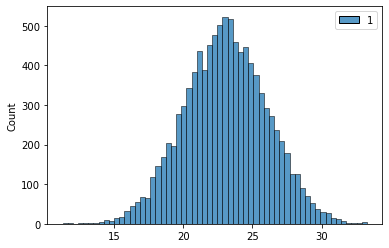

In [17]:
sns.histplot(data)

In [18]:
np.mean(data)

1    23.036075
dtype: float64

In [19]:
np.std(data)

1    2.995147
dtype: float64

The data appears normally distributed with a mean of 23.04 and standard deviation of 3. The data ranges from 11.25 to 33.29 and contains 1000 elements.

## Question 3

I would use libraries that are optimized for large datasets such as Vaex or Dask because they use lazy computation. This means that expressions are only evaluated when necessary. Also the I would not use Pandas dataframes as they are not optimized to handle this much data. Furthermore, the functinality of Vaex and Dask is similar to that of Pandas and Numpy.

## Question 4

I would automate the process with an AWS pipeline.

## Question 5

My favorite mathematician is Terence Tao. He is a math professor at UCLA and arguably one of the greatest mathematicians alive today. Though my mathematics knowledge isn't advanced enough to comprehend his complex research topics, what I appreciate is his teaching style and sense of humor. Last year when my linear algebra professor was out sick for a day, Professor Tao was our substitute. That 50 minute lecture on determinants is the best lecture I've ever had. Not only was he clear in his definitions and explanations, he also provided useful examples to help us build geometric intuition. Through it all, he cracked subtle jokes and answered students questions thoughtfully. I proceeded to watch the recording of the lecture two times that month just because I enjoyed his teaching so much. 